In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = 'CleanHistoricalDataSP500.csv'
data = pd.read_csv(file_path)

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data.sort_values(by='Date', inplace=True)
data.set_index('Date', inplace=True)

In [7]:
data

,Close/Last,Open,High,Low
Date,,,,
2015-01-07,2025.90,2005.55,2029.61,2005.55
2015-01-08,2062.14,2030.61,2064.08,2030.61
2015-01-09,2044.81,2063.45,2064.43,2038.33
2015-01-12,2028.26,2046.13,2049.30,2022.58
2015-01-13,2023.03,2031.58,2056.93,2008.25
...,...,...,...,...
2024-12-30,5906.94,5920.67,5940.79,5869.16
2024-12-31,5881.63,5919.74,5929.74,5868.86
2025-01-02,5868.55,5903.26,5935.09,5829.53


In [8]:
data['Daily Return'] = data['Close/Last'].pct_change() * 100

In [9]:
data['Month'] = data.index.to_period('M')
monthly_returns = data.groupby('Month')['Close/Last'].apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)

In [10]:
data['Year'] = data.index.to_period('Y')
annual_returns = data.groupby('Year')['Close/Last'].apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)

In [11]:
total_years = (data.index[-1] - data.index[0]).days / 365.25
cagr = ((data['Close/Last'].iloc[-1] / data['Close/Last'].iloc[0]) ** (1 / total_years) - 1) * 100

In [12]:
running_max = data['Close/Last'].cummax()
drawdowns = (data['Close/Last'] / running_max - 1) * 100
max_drawdown = drawdowns.min()

In [13]:
max_loss_year = data.groupby('Year')['Close/Last'].apply(lambda x: (x / x.cummax() - 1).min() * 100)

In [14]:
analytics = {
    "Annual Returns": annual_returns.mean(),
    "Annual Growth Rate (CAGR)": cagr,
    "Maximum Drawdown": max_drawdown,
    "Maximum Loss by Year": max_loss_year.mean(),
}

In [15]:
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

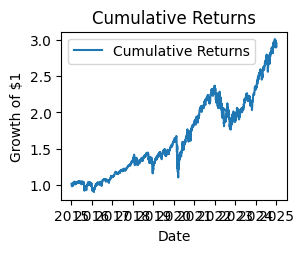

In [16]:
plt.subplot(2, 2, 1)
cumulative_returns = (1 + data['Daily Return'] / 100).cumprod()  
plt.plot(data.index, cumulative_returns, label='Cumulative Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1')
plt.legend()

Text(0, 0.5, 'Return (%)')

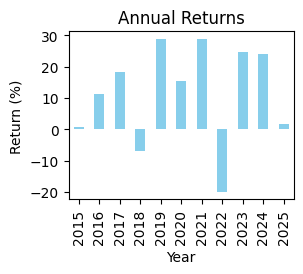

In [17]:
plt.subplot(2, 2, 2)
annual_returns.plot(kind='bar', color='skyblue')
plt.title('Annual Returns')
plt.xlabel('Year')
plt.ylabel('Return (%)')


Text(0, 0.5, 'Return (%)')

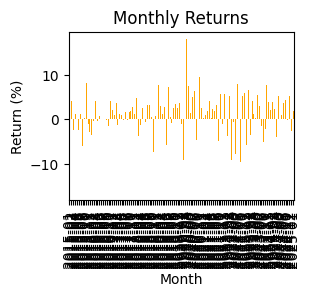

In [20]:
plt.subplot(2, 2, 3)
monthly_returns.plot(kind='bar', color='orange')
plt.title('Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Return (%)')


Text(0, 0.5, 'Drawdown (%)')

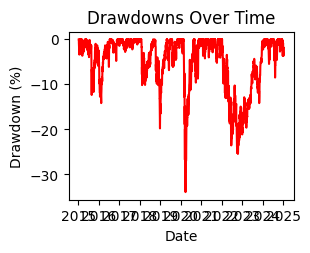

In [21]:
plt.subplot(2, 2, 4)
plt.plot(drawdowns, color='red')
plt.title('Drawdowns Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')

In [23]:
plt.tight_layout()
plt.savefig('financial_analysis_charts.png')

<Figure size 640x480 with 0 Axes>

In [25]:
with open('analytics_summary.txt', 'w') as f:
    for key, value in analytics.items():
        f.write(f"{key}: {value:.2f}%\n")

In [26]:
processed_file_path = 'Processed_HistoricalDataSP500.csv'
data.to_csv(processed_file_path)

print("Analytics summary and visualizations have been saved.")

Analytics summary and visualizations have been saved.
